<a href="https://colab.research.google.com/github/salwaa-hub/jbp12_machinelearning/blob/main/jbp12_machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WORKSHEET LSTM** (Salwa Salsabila Daffa'atulhaq - 4.33.23.2.25)

Import dan Generate Data Sintetik (cosinus/spiral)

In [28]:
# 1. Import dan generate data cosinus
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from IPython.display import display
import time

def generate_cosine_data(seq_length=50, num_samples=1000):
    X, y = [], []
    for _ in range(num_samples):
        start = np.random.rand() * 2 * np.pi
        xs = np.array([np.cos(start + i * 0.1) for i in range(seq_length + 1)])
        X.append(xs[:-1])
        y.append(xs[-1])
    X = np.array(X).reshape((num_samples, seq_length, 1))
    y = np.array(y)
    return X, y

X, y = generate_cosine_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fungsi Build Model LSTM Dinamis

In [29]:
# 2. Build model LSTM fleksibel
def build_lstm_model(input_shape, units=50, layers=1, dropout=0.2, optimizer='adam'):
    model = Sequential()
    for i in range(layers - 1):
        model.add(LSTM(units, return_sequences=True, input_shape=input_shape))
        model.add(Dropout(dropout))
    model.add(LSTM(units, input_shape=input_shape))
    model.add(Dropout(dropout))
    model.add(Dense(1))

    if optimizer == 'adam':
        opt = Adam()
    elif optimizer == 'rmsprop':
        opt = RMSprop()
    elif optimizer == 'sgd':
        opt = SGD(momentum=0.9)
    else:
        opt = Adam()

    model.compile(optimizer=opt, loss='mse')
    return model

Fungsi untuk Melatih Model

In [30]:
# 3. Latih dan evaluasi per konfigurasi
def train_and_evaluate(X_train, y_train, X_test, y_test, config):
    print(f"🔧 Melatih dengan config: {config}")
    model = build_lstm_model(
        input_shape=(X_train.shape[1], X_train.shape[2]),
        units=config['units'],
        layers=config['layers'],
        dropout=config['dropout'],
        optimizer=config['optimizer']
    )

    start = time.time()
    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=config['epochs'],
                        batch_size=config['batch_size'],
                        verbose=0)
    end = time.time()

    val_loss = history.history['val_loss'][-1]
    elapsed = end - start

    print(f"📉 Validation Loss Akhir: {val_loss:.6f}")
    print(f"⏱️ Waktu Pelatihan: {elapsed:.2f} detik")

    plt.figure(figsize=(6, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Learning Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

    return history, val_loss, elapsed

Fungsi untuk Menjalankan Semua Eksperimen

In [31]:
# 4. Jalankan semua eksperimen
def run_experiments(X_train, y_train, X_test, y_test):
    configs = [
        {'units': 50, 'layers': 1, 'dropout': 0.2, 'optimizer': 'adam', 'batch_size': 32, 'epochs': 10},
        {'units': 100, 'layers': 2, 'dropout': 0.3, 'optimizer': 'rmsprop', 'batch_size': 64, 'epochs': 10},
        {'units': 50, 'layers': 1, 'dropout': 0.2, 'optimizer': 'sgd', 'batch_size': 32, 'epochs': 10},
        {'units': 75, 'layers': 2, 'dropout': 0.5, 'optimizer': 'adam', 'batch_size': 16, 'epochs': 10},
        {'units': 100, 'layers': 3, 'dropout': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32, 'epochs': 10},
    ]

    results = []
    histories = []

    for config in configs:
        history, val_loss, elapsed = train_and_evaluate(X_train, y_train, X_test, y_test, config)
        config_result = config.copy()
        config_result.update({'val_loss': val_loss, 'elapsed_time': elapsed})
        results.append(config_result)
        histories.append(history)

    df_results = pd.DataFrame(results)
    return histories, df_results

Fungsi Evaluasi: Tampilkan Tabel & Simpan CSV

In [32]:
# 5. Evaluasi hasil eksperimen
def display_results_table(df):
    sorted_df = df.sort_values(by='val_loss')
    display(sorted_df)

def export_results_to_csv(df, filename="hasil_lstm_eksperimen.csv"):
    df.to_csv(filename, index=False)
    print(f"Hasil eksperimen disimpan ke: {filename}")

def plot_performance(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='elapsed_time', y='val_loss', hue='optimizer', style='layers', s=100)
    plt.title("Trade-off: Waktu Pelatihan vs Validation Loss")
    plt.xlabel("Waktu Pelatihan (detik)")
    plt.ylabel("Validation Loss")
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Fungsi Visualisasi Trade-off Performa vs Waktu

In [34]:
def plot_performance(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='elapsed_time', y='val_loss', hue='optimizer', style='layers', s=100)
    plt.title("Trade-off: Waktu Pelatihan vs Validation Loss")
    plt.xlabel("Waktu Pelatihan (detik)")
    plt.ylabel("Validation Loss")
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


Eksekusi Semua Langkah

🔧 Melatih dengan config: {'units': 50, 'layers': 1, 'dropout': 0.2, 'optimizer': 'adam', 'batch_size': 32, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


📉 Validation Loss Akhir: 0.000761
⏱️ Waktu Pelatihan: 8.36 detik


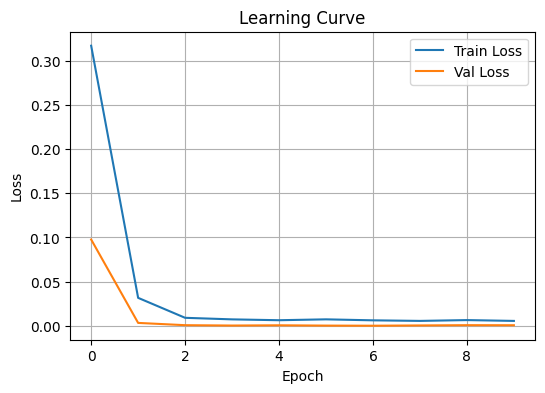

🔧 Melatih dengan config: {'units': 100, 'layers': 2, 'dropout': 0.3, 'optimizer': 'rmsprop', 'batch_size': 64, 'epochs': 10}
📉 Validation Loss Akhir: 0.002079
⏱️ Waktu Pelatihan: 27.97 detik


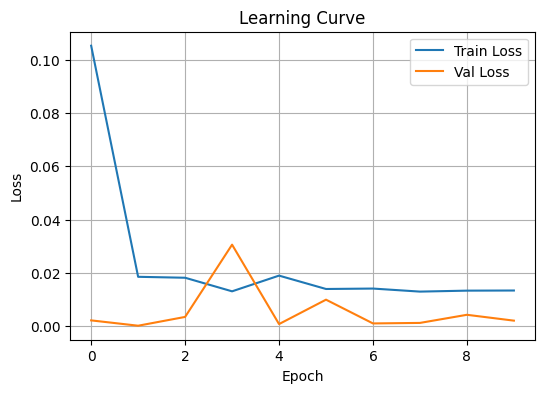

🔧 Melatih dengan config: {'units': 50, 'layers': 1, 'dropout': 0.2, 'optimizer': 'sgd', 'batch_size': 32, 'epochs': 10}
📉 Validation Loss Akhir: 0.000336
⏱️ Waktu Pelatihan: 7.35 detik


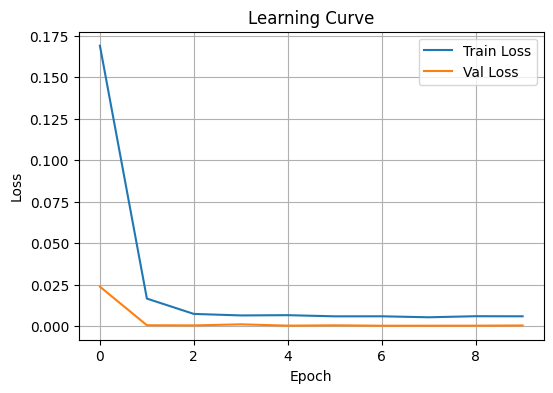

🔧 Melatih dengan config: {'units': 75, 'layers': 2, 'dropout': 0.5, 'optimizer': 'adam', 'batch_size': 16, 'epochs': 10}
📉 Validation Loss Akhir: 0.004771
⏱️ Waktu Pelatihan: 29.17 detik


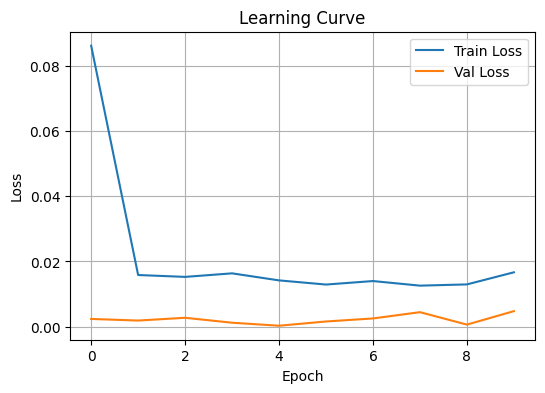

🔧 Melatih dengan config: {'units': 100, 'layers': 3, 'dropout': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32, 'epochs': 10}
📉 Validation Loss Akhir: 0.004471
⏱️ Waktu Pelatihan: 36.52 detik


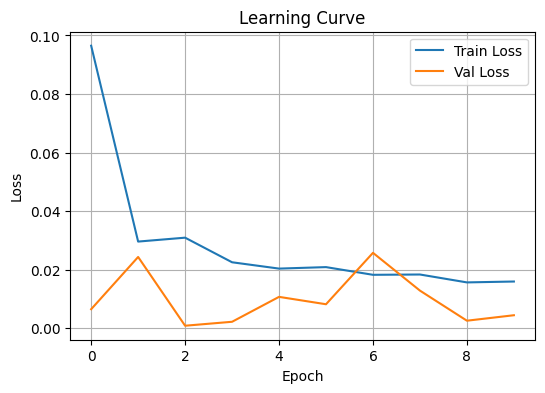

,units,layers,dropout,optimizer,batch_size,epochs,val_loss,elapsed_time
2,50,1,0.2,sgd,32,10,0.000336,7.353554
0,50,1,0.2,adam,32,10,0.000761,8.358628
1,100,2,0.3,rmsprop,64,10,0.002079,27.973985
4,100,3,0.3,rmsprop,32,10,0.004471,36.524972
3,75,2,0.5,adam,16,10,0.004771,29.171514


Hasil eksperimen disimpan ke: hasil_lstm_eksperimen.csv


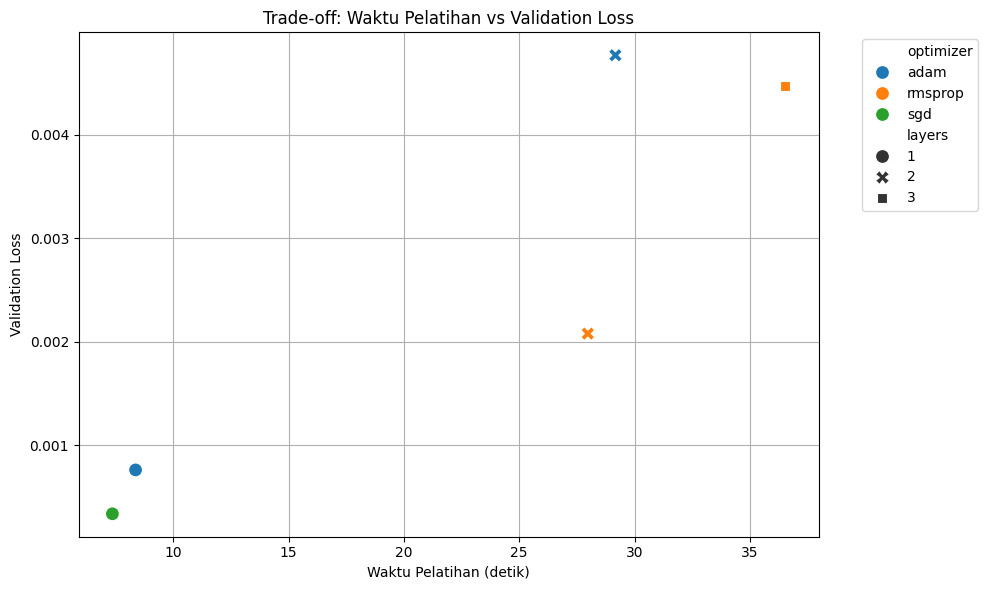

In [33]:
# 6. Eksekusi dan tampilkan hasil
histories, df_results = run_experiments(X_train, y_train, X_test, y_test)
display_results_table(df_results)
export_results_to_csv(df_results)
plot_performance(df_results)